In [ ]:
# Setup custom U-value things for creation of the custom IDF

In [141]:
# Modify the IDF file

# %run "../..//PythonScripts/00_ModifyIDF_FullConstructions.py" "Test_4Zone.idf" "../../Resources/idf_config.json"

%run "../..//PythonScripts/00_ModifyIDF_FullConstructions.py" "Test_4Zone.idf" "../../Resources/idf_config_os.json"



Config loaded from ../../Resources/idf_config_os.json

IDF loaded from Test_4Zone.idf

EPW loaded from /Users/Tristan/Desktop/SAMAzure/TestFiles/Resources/GBR_Cardiff_CIBSE_TRY_CONVERTED.epw

Zone conditions loaded from /Users/Tristan/Desktop/SAMAzure/TestFiles/Resources/internal_gains_library.json
Zone conditions set to High Density Seminar Room

SITE:LOCATION modified
VERSION modified
SIZINGPERIOD:DESIGNDAY modified
SIMULATIONCONTROL modified
RUNPERIOD modified
SITE:GROUNDTEMPERATURE:BUILDINGSURFACE modified
BUILDING modified
TIMESTEP modified
SHADOWCALCULATION modified
SCHEDULETYPELIMITS modified
SCHEDULE:DAY:INTERVAL modified
SCHEDULE:DAY:HOURLY modified
SCHEDULE:WEEK:DAILY modified
SCHEDULE:WEEK:COMPACT modified
SCHEDULE:YEAR modified
PEOPLE modified
LIGHTS modified
ELECTRICEQUIPMENT modified
ZONEINFILTRATION:DESIGNFLOWRATE modified
ZONEVENTILATION:DESIGNFLOWRATE modified
HVACTEMPLATE:THERMOSTAT modified
HVACTEMPLATE:ZONE:IDEALLOADSAIRSYSTEM modified
DESIGNSPECIFICATION:OUTDOORAI

In [142]:
# Run the Eplus file
import io
import time
import subprocess
import sys
import os

# Delete the files we dont need
old_results = [
    "eplusmtr.csv",
    "eplusout.audit",
    "eplusout.bnd",
    "eplusout.csv",
    "eplusout.eio",
    "eplusout.end",
    "eplusout.err",
    "eplusout.eso",
    "eplusout.expidf",
    "eplusout.mdd",
    "eplusout.mtd",
    "eplusout.rdd",
    "eplusout.rvaudit",
    "eplusout.shd",
    "eplusout.sql",
    "sqlite.err",
    "test.log",
]

for _file in old_results:
    try:
        os.remove(_file)
        print("{0:} removed".format(_file))
    except:
        print("{0:} not found".format(_file))

print("\nRunning simulation ...")

# weatherfile = "C:/Users/tgerrish/Desktop/SAMAzure/TestFiles/Resources/GBR_Cardiff_CIBSE_TRY_ORIGINAL.epw"
# subprocess.call("C:/EnergyPlusV8-8-0/energyplus.exe -a -x -r -w {0:} C:/Users/tgerrish/Desktop/SAMAzure/TestFiles/reference/outputComparison/Test_4Zone_modified.idf".format(weatherfile), shell=True)

weatherfile = "/Users/Tristan/Desktop/SAMAzure/TestFiles/Resources/GBR_Cardiff_CIBSE_TRY_ORIGINAL.epw"
subprocess.call("/Applications/EnergyPlus-8-8-0/energyplus-8.8.0 -a -x -r -w /Users/Tristan/Desktop/SAMAzure/TestFiles/Resources/GBR_Cardiff_CIBSE_TRY_ORIGINAL.epw /Users/Tristan/Desktop/SAMAzure/TestFiles/reference/outputComparison/Test_4Zone_modified.idf", shell=True)


print("Simulation complete")

# filename = 'test.log'
# with io.open(filename, 'wb') as writer, io.open(filename, 'rb', 1) as reader:
#     try:
#         process = subprocess.Popen("C:/EnergyPlusV8-8-0/energyplus.exe -a -x -r -w C:/Users/tgerrish/Desktop/SAMAzure/TestFiles/Resources/GBR_Cardiff_CIBSE_TRY.epw C:/Users/tgerrish/Desktop/temp_delete/Test_4Zone_modified.idf", stdout=writer)
#     except:
#         process = subprocess.Popen("/Applications/EnergyPlus-8-8-0/energyplus -a -x -r -w /Users/Tristan/Desktop/SAMAzure/TestFiles/Resources/GBR_Cardiff_CIBSE_TRY.epw /Users/Tristan/Desktop/SAMAzure/TestFiles/reference/outputComparison/Test_4Zone_modified.idf", stdout=writer)
#     while process.poll() is None:
#         sys.stdout.write(reader.read())
#         time.sleep(0.5)
#     # Read the remaining
#     sys.stdout.write(reader.read())



eplusmtr.csv not found
eplusout.audit removed
eplusout.bnd removed
eplusout.csv removed
eplusout.eio removed
eplusout.end removed
eplusout.err removed
eplusout.eso removed
eplusout.expidf removed
eplusout.mdd removed
eplusout.mtd removed
eplusout.rdd removed
eplusout.rvaudit removed
eplusout.shd removed
eplusout.sql removed
sqlite.err removed
test.log not found

Running simulation ...
Simulation complete


In [143]:
import pandas as pd
import numpy as np

def load_weather_epw_alt(path, start_day="Monday"):
    year = {
            "Monday": "2018",
            "Tuesday": "2002",
            "Wednesday": "2003",
            "Thursday": "2009",
            "Friday": "2010",
            "Saturday": "2011",
            "Sunday": "2006"
        }[start_day]

    loc_dict = {
        6: 'dry_bulb_temperature',
        7: 'dew_point_temeperature',
        8: 'relative_humidity',
        9: 'atmospheric_station_pressure',
        10: 'extraterrestrial_horizontal_radiation',
        11: 'extraterrestrial_direct_normal_radiation',
        12: 'horizontal_infrared_radiation_intensity',
        13: 'global_horizontal_radiation',
        14: 'direct_normal_radiation',
        15: 'diffuse_horizontal_radiation',
        16: 'global_horizontal_illuminance',
        17: 'direct_normal_illuminance',
        18: 'diffuse_horizontal_illuminance',
        19: 'zenith_luminance',
        20: 'wind_direction',
        21: 'wind_speed',
        22: 'total_sky_cover',
        23: 'opaque_sky_cover',
        24: 'visibility',
        25: 'ceiling_height',
        26: 'present_weather_observation',
        27: 'present_weather_codes',
        28: 'precipitable_water',
        29: 'aerosol_optical_depth',
        30: 'snow_depth',
        31: 'days_since_last_snowfall',
        32: 'albedo',
        33: 'liquid_precipitation_depth',
        34: 'liquid_precipitation_quantity'
    }

    with open(path) as f:
        content = f.readlines()
        content = [i.split(",") for i in [x.strip() for x in content]]

    df = pd.DataFrame(data=content[-8760:])
    df.replace(-999, 0, inplace=True)
    df.set_index(pd.date_range(start=year+"-01-01 00:00", end=year+"-12-31 23:00", freq="60T"), inplace=True)
    df.rename(loc_dict, axis=1, inplace=True)
    df = df[loc_dict.values()]
    df = df.astype("float64", errors="ignore")

    df["city"] = content[0][1].strip()
    df["country"] = np.nan
    df["latitude"] = float(content[0][-3].strip())
    df["longitude"] = float(content[0][-2].strip())
    df["elevation"] = float(content[0][-1].strip())
    df["filename"] = os.path.basename(path).replace(".csv", "")

    return df

EPLUS_WEATHER = load_weather_epw_alt(weatherfile)

In [144]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import csv

#######################################
# Load energyplus performance results #
#######################################

EPLUS_OUTPUT = "eplusout.csv"
EPLUS = pd.read_csv(EPLUS_OUTPUT, index_col=0, header=0, low_memory=False)
EPLUS.index = pd.DatetimeIndex(start="2018-01-01 01:00", end="2019-01-01 00:00", freq="60T")
for col in EPLUS.columns:
    if "[J]" in col:
        EPLUS[col] = EPLUS[col] / 3600000
        EPLUS.rename(columns={EPLUS[col].name:EPLUS[col].name.replace("[J]", "[kW]")}, inplace=True)
    elif "[m3]" in col:
        EPLUS[col] = EPLUS[col] * 1000
        EPLUS.rename(columns={EPLUS[col].name:EPLUS[col].name.replace("[m3]", "[l]")}, inplace=True)
        EPLUS.rename(columns={EPLUS[col].name:EPLUS[col].name.replace("[m3/s]", "[l/s]")}, inplace=True)

link_vars = {
    "Zone Electric Equipment Total Heating Energy [kW](Hourly)": "Equipment gain",
    "Zone Lights Total Heating Energy [kW](Hourly)": "Lighting gain",
    "Zone People Total Heating Energy [kW](Hourly)": "People gain",
    "Zone Air Relative Humidity [%](Hourly)": "Relative humidity",
    "Zone Air Temperature [C](Hourly)": "Air temperature",
    "Zone Mean Radiant Temperature [C](Hourly)": "Mean radiant temperature",
    "Zone Thermostat Cooling Setpoint Temperature [C](Hourly)": "Cooling set point",
    "Zone Thermostat Heating Setpoint Temperature [C](Hourly)": "Heating set point",
    "Zone Mechanical Ventilation Current Density Volume Flow Rate [m3/s](Hourly)": "Natural vent",
    "Zone Windows Total Transmitted Solar Radiation Energy [kW](Hourly)": "Solar gain",
    "Zone People Occupant Count [](Hourly)": "Number of people",
    "Zone Total Internal Total Heating Energy [kW](Hourly)": "Internal gain",
    "Zone Mean Air Dewpoint Temperature [C](Hourly)": "Dew-point temperature",
    "Zone Ideal Loads Outdoor Air Sensible Heating Energy [kW](Hourly)": "Heating plant sensible load",
    "Zone Ideal Loads Outdoor Air Sensible Cooling Energy [kW](Hourly)": "Cooling plant sensible load",
}

zoneName = []
zoneVariable = []
for i, j in [k.split(":") for k in EPLUS.columns]:
    zoneName.append(i.replace(" IDEAL LOADS AIR SYSTEM", "").title())
    zoneVariable.append(link_vars[j.strip()])

EPLUS.columns = pd.MultiIndex.from_tuples(list(zip(*[zoneName, zoneVariable])), names=["zone", "variable"])
EPLUS.sort_index(axis=1, ascending=True, inplace=True)
EPLUS = EPLUS.astype(dtype="float64", errors="ignore")

########################################
# Load energyplus construction results #
########################################
def get_eplus_construction_properties(path):
    with open(path, "r") as f:
        m = f.readlines()
        for n, i in enumerate(m):
            if "Construction CTF" in i:
                const_n = n
            if "Material CTF Summary" in i:
                constmat_n = n
            if "WindowConstruction" in i:
                win_n = n
            if "WindowMaterial:Glazing" in i:
                winmat_n = n

    cf1 = pd.DataFrame([i.rstrip().split(",") for i in m[const_n+2:constmat_n-2]]).iloc[:, 1:]
    cf1 = cf1.rename(columns=cf1.iloc[0]).drop(cf1.index[0])#[["Construction", "Reflectance", "U-Factor with Film [W/m2-K]", "U-Factor no Film [W/m2-K]"]]
    cf1.set_index("Construction Name", drop=True, inplace=True)
    cf1 = cf1[["ThermalConductance {w/m2-K}", "OuterThermalAbsorptance", "InnerThermalAbsorptance", "OuterSolarAbsorptance", "InnerSolarAbsorptance"]]
    cf1.columns = ["U-Value W/m2K", "Outer Thermal Absorptance", "Inner Thermal Absorptance", "Outer Solar Absorptance", "Inner Solar Absorptance"]

    cf2 = pd.DataFrame([i.rstrip().split(",") for i in m[win_n+2:winmat_n-2]]).iloc[:, 1:]
    cf2 = cf2.rename(columns=cf2.iloc[0]).drop(cf2.index[0])
    cf2.set_index("Construction Name", drop=True, inplace=True)
    cf2 = cf2[["Conductance {W/m2-K}", "SHGC", "Solar Transmittance at Normal Incidence", "Visible Transmittance at Normal Incidence"]]
    cf2.columns = ["U-Value W/m2K", "SHGC", "Solar Transmittance", "Visible Transmittance"]

    return pd.concat([cf1, cf2], sort=True)

cf = get_eplus_construction_properties("eplustbl.csv")

In [145]:
cf

,Inner Solar Absorptance,Inner Thermal Absorptance,Outer Solar Absorptance,Outer Thermal Absorptance,SHGC,Solar Transmittance,U-Value W/m2K,Visible Transmittance
Construction Name,,,,,,,,
INTERIOR WALL,0.400,0.100,0.400,0.100,NaN,NaN,2.807,NaN
EXTERIOR WALL,0.400,0.100,0.700,0.100,NaN,NaN,1.084,NaN
INTERIOR FLOOR,0.500,0.900,0.300,0.900,NaN,NaN,1.515,NaN
EXTERIOR FLOOR,0.700,0.900,0.700,0.900,NaN,NaN,0.5563,NaN
INTERIOR CEILING,0.300,0.900,0.500,0.900,NaN,NaN,1.515,NaN
EXTERIOR ROOF,0.300,0.900,0.500,0.900,NaN,NaN,0.1737,NaN
AIR WALL,0.001,0.001,0.001,0.001,NaN,NaN,13.10,NaN
EXTERIOR WINDOW,NaN,NaN,NaN,NaN,0.599,0.525,1.600,0.651
INTERIOR WINDOW,NaN,NaN,NaN,NaN,0.950,0.934,5.787,0.901


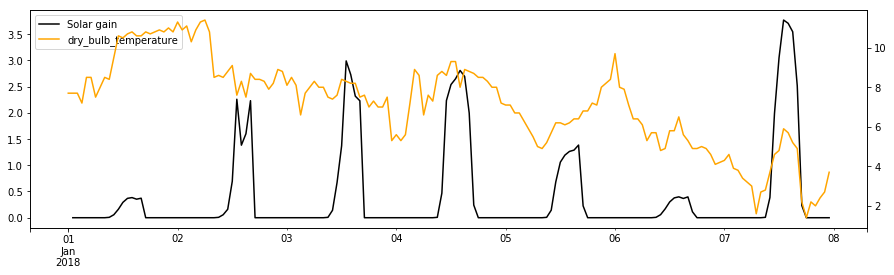

In [9]:
space = "Zone1"
variable = link_vars.values()[4]
start = "2018-01-01"
end = "2018-01-07"

fig, ax1 = plt.subplots(1, 1, figsize=(15, 4))
ax2 = ax1.twinx()
EPLUS_WEATHER["dry_bulb_temperature"][start:end].plot(ax=ax2, c="orange")
EPLUS[space][variable][start:end].plot(ax=ax1, c="black")
h1, l1 = ax1.get_legend_handles_labels()
h2, l2 = ax2.get_legend_handles_labels()
ax1.legend(h1+h2, l1+l2, loc=0)

In [15]:
test_vals = np.concatenate([np.linspace(0.001, 1.0, 30), np.linspace(1.0, 5.0, 50)])

In [146]:
idf.idfobjects["MATERIAL"][3]


MATERIAL,
    EXTERIOR WALL MIDDLE MATERIAL,    !- Name
    MediumRough,              !- Roughness
    0.025757177178389726,     !- Thickness
    0.036,                    !- Conductivity
    50,                       !- Density
    1030,                     !- Specific Heat
    0.1,                      !- Thermal Absorptance
    0.7,                      !- Solar Absorptance
    1.0;                      !- Visible Absorptance


In [18]:
# Modify a single variable and get the vbalues from which to interpolate custom insulation thickness for U-Values

from eppy.modeleditor import IDF

# u_val_dict = {}
for insulation_thickness in test_vals:
    
    idf_file = "Test_4Zone_modified.idf"
#     IDF.setiddname("C:/EnergyPlusV8-8-0/Energy+.idd")
    IDF.setiddname("/Applications/EnergyPlus-8-8-0/Energy+.idd")
    idf = IDF(idf_file)
    idf.idfobjects["MATERIAL"][3].Thickness = insulation_thickness
    idf.saveas(idf_file)
    
    print("Running for an insulation thickness of {0:}".format(insulation_thickness))

    for _file in ["eplusmtr.csv", "eplusout.audit", "eplusout.bnd", "eplusout.csv", "eplusout.eio", "eplusout.end", "eplusout.err", "eplusout.eso", "eplusout.expidf", "eplusout.mdd", "eplusout.mtd", "eplusout.rdd", "eplusout.rvaudit", "eplusout.shd", "eplusout.sql", "sqlite.err", "test.log",]:
        try:
            os.remove(_file)
        except:
            pass

    print("\nRunning simulation ...")
    # weatherfile = "C:/Users/tgerrish/Desktop/SAMAzure/TestFiles/Resources/GBR_Cardiff_CIBSE_TRY_ORIGINAL.epw"
    # subprocess.call("C:/EnergyPlusV8-8-0/energyplus.exe -a -x -r -w {0:} C:/Users/tgerrish/Desktop/SAMAzure/TestFiles/reference/outputComparison/Test_4Zone_modified.idf".format(weatherfile), shell=True)

    weatherfile = "/Users/Tristan/Desktop/SAMAzure/TestFiles/Resources/GBR_Cardiff_CIBSE_TRY_ORIGINAL.epw"
    subprocess.call("/Applications/EnergyPlus-8-8-0/energyplus-8.8.0 -a -x -r -w /Users/Tristan/Desktop/SAMAzure/TestFiles/Resources/GBR_Cardiff_CIBSE_TRY_ORIGINAL.epw /Users/Tristan/Desktop/SAMAzure/TestFiles/reference/outputComparison/Test_4Zone_modified.idf", shell=True)
    print("Simulation complete")
    
    u_val_dict[float(get_eplus_construction_properties("eplustbl.csv")["U-Value W/m2K"]["EXTERIOR WALL"])] = insulation_thickness


Running for an insulation thickness of 1.0

Running simulation ...
Simulation complete
Running for an insulation thickness of 1.08163265306

Running simulation ...
Simulation complete
Running for an insulation thickness of 1.16326530612

Running simulation ...
Simulation complete
Running for an insulation thickness of 1.24489795918

Running simulation ...
Simulation complete
Running for an insulation thickness of 1.32653061224

Running simulation ...
Simulation complete
Running for an insulation thickness of 1.40816326531

Running simulation ...
Simulation complete
Running for an insulation thickness of 1.48979591837

Running simulation ...
Simulation complete
Running for an insulation thickness of 1.57142857143

Running simulation ...
Simulation complete
Running for an insulation thickness of 1.65306122449

Running simulation ...
Simulation complete
Running for an insulation thickness of 1.73469387755

Running simulation ...
Simulation complete
Running for an insulation thickness of 1

In [90]:
u_val_dict

{0.01946: 5.0,
 0.01974: 5.0,
 0.02066: 1.7346938775510203,
 0.02168: 1.6530612244897958,
 0.02196: 1.631578947368421,
 0.0228: 1.5714285714285714,
 0.02404: 1.489795918367347,
 0.0252: 1.4210526315789473,
 0.02543: 1.4081632653061225,
 0.02699: 1.3265306122448979,
 0.02875: 1.2448979591836735,
 0.02956: 1.2105263157894737,
 0.03075: 1.163265306122449,
 0.03306: 1.0816326530612246,
 0.03573: 1.0,
 0.037: 0.965551724137931,
 0.03836: 0.9311034482758621,
 0.03982: 0.8966551724137931,
 0.0414: 0.8622068965517241,
 0.0431: 0.8277586206896551,
 0.04496: 0.7933103448275862,
 0.04698: 0.7588620689655172,
 0.04919: 0.7244137931034482,
 0.05162: 0.6899655172413793,
 0.0543: 0.6555172413793103,
 0.05728: 0.6210689655172413,
 0.0606: 0.5866206896551724,
 0.06433: 0.5521724137931034,
 0.06855: 0.5177241379310344,
 0.07336: 0.4832758620689655,
 0.0789: 0.44882758620689656,
 0.08534: 0.41437931034482756,
 0.09293: 0.3799310344827586,
 0.102: 0.34548275862068967,
 0.113: 0.31103448275862067,
 0.1267:

[(0.01946,
  0.01974,
  0.02066,
  0.02168,
  0.02196,
  0.0228,
  0.02404,
  0.0252,
  0.02543,
  0.02699,
  0.02875,
  0.02956,
  0.03075,
  0.03306,
  0.03573,
  0.037,
  0.03836,
  0.03982,
  0.0414,
  0.0431,
  0.04496,
  0.04698,
  0.04919,
  0.05162,
  0.0543,
  0.05728,
  0.0606,
  0.06433,
  0.06855,
  0.07336,
  0.0789,
  0.08534,
  0.09293,
  0.102,
  0.113,
  0.1267,
  0.1442,
  0.1673,
  0.1992,
  0.2461,
  0.322,
  0.4654,
  0.839,
  4.255),
 (5.0,
  5.0,
  1.7346938775510203,
  1.6530612244897958,
  1.631578947368421,
  1.5714285714285714,
  1.489795918367347,
  1.4210526315789473,
  1.4081632653061225,
  1.3265306122448979,
  1.2448979591836735,
  1.2105263157894737,
  1.163265306122449,
  1.0816326530612246,
  1.0,
  0.965551724137931,
  0.9311034482758621,
  0.8966551724137931,
  0.8622068965517241,
  0.8277586206896551,
  0.7933103448275862,
  0.7588620689655172,
  0.7244137931034482,
  0.6899655172413793,
  0.6555172413793103,
  0.6210689655172413,
  0.5866206896551

In [108]:
u_values = u_val_dict.keys()
insulation_thicknesses = u_val_dict.values()
insulation_thicknesses, u_values = zip(*sorted(list(zip(*[u_values, insulation_thicknesses])), key=lambda x: x[0]))

print("u_values = [{0:}]\n".format(", ".join([str(i) for i in u_values])))

print("insulation_thicknesses = [{0:}]\n".format(", ".join([str(i) for i in insulation_thicknesses])))

print("Min: {0:}\nMax: {1:}".format(min(u_values), max(u_values)))

u_values = [5.0, 5.0, 1.7346938775510203, 1.6530612244897958, 1.631578947368421, 1.5714285714285714, 1.489795918367347, 1.4210526315789473, 1.4081632653061225, 1.3265306122448979, 1.2448979591836735, 1.2105263157894737, 1.163265306122449, 1.0816326530612246, 1.0, 0.965551724137931, 0.9311034482758621, 0.8966551724137931, 0.8622068965517241, 0.8277586206896551, 0.7933103448275862, 0.7588620689655172, 0.7244137931034482, 0.6899655172413793, 0.6555172413793103, 0.6210689655172413, 0.5866206896551724, 0.5521724137931034, 0.5177241379310344, 0.4832758620689655, 0.44882758620689656, 0.41437931034482756, 0.3799310344827586, 0.34548275862068967, 0.31103448275862067, 0.2765862068965517, 0.24213793103448275, 0.20768965517241378, 0.17324137931034483, 0.13879310344827586, 0.10434482758620689, 0.06989655172413793, 0.035448275862068966, 0.001]

insulation_thicknesses = [0.01946, 0.01974, 0.02066, 0.02168, 0.02196, 0.0228, 0.02404, 0.0252, 0.02543, 0.02699, 0.02875, 0.02956, 0.03075, 0.03306, 0.03573

In [147]:
f(0.025757177178389726)

array(1.39104253)

0.025757177178389726


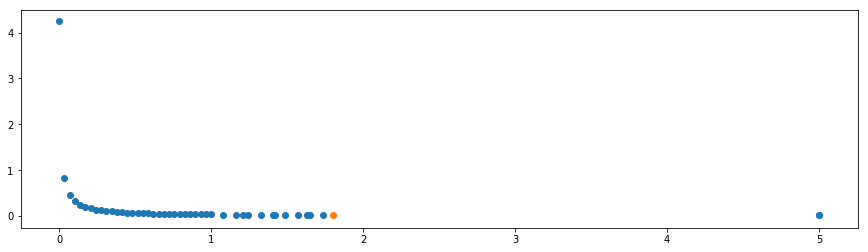

In [132]:
from scipy import interpolate




f = interpolate.interp1d(insulation_thicknesses, u_values)

fig, ax = plt.subplots(1, 1, figsize=(15, 4))
ax.scatter(u_values, insulation_thicknesses)

target_u_value = 1.8

ax.scatter(target_u_value, f(target_u_value))
print(f(target_u_value))

In [48]:
%matplotlib inline
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd

from scipy.stats import ttest_ind, pearsonr, spearmanr

WEATHER_FILE = r"C:\Users\tgerrish\Desktop\temp_delete\ExtWeather.csv"
EPLUS_OUTPUT = r"C:\Users\tgerrish\Desktop\temp_delete\eplusout.csv"
IES_OUTPUT = r"C:\Users\tgerrish\Desktop\temp_delete\Test_4ZoneIES\vista\File Name [IESCheck.aps].csv"

# Load weather
WEATHER = pd.read_csv(WEATHER_FILE, index_col=0, header=0, parse_dates=True)
WEATHER = WEATHER.resample("60T").mean()

# LOAD IES RESULTS FILE
IES = pd.read_csv(IES_OUTPUT, index_col=[0, 1, 2, 3], header=[0, 1, 2]).transpose().iloc[:-1, :]

# TIDY IES RESULTS FILE
IES.index = pd.DatetimeIndex(start="2018-01-01 00:30", end="2018-12-31 23:30", freq="60T")
IES.columns = pd.MultiIndex.from_tuples(list(zip(*[IES.columns.get_level_values(3), IES.columns.get_level_values(0)])), names=["zone", "variable"])
IES.sort_index(axis=1, ascending=True, inplace=True)
IES = IES.apply(pd.to_numeric, errors="coerce")
IES = IES.resample("60T").mean()

# Load the CSV file for the EnergyPlus output
EPLUS = pd.read_csv(EPLUS_OUTPUT, index_col=0, header=0, low_memory=False)
EPLUS.index = pd.DatetimeIndex(start="2018-01-01 01:00", end="2019-01-01 00:00", freq="60T")

# Get masks to descibe whether each column needs to be converted to IES units
J_to_kW = [True if "[J]" in col else False for col in EPLUS.columns]
m3s_to_ls = [True if "[m3/s]" in col else False for col in EPLUS.columns]
m3_to_l = [True if "[m3]" in col else False for col in EPLUS.columns]

# Convert the columns
varr = []
zone = []
new_cols = []
for i, j in enumerate(EPLUS.columns):
    if J_to_kW[i]:
        EPLUS.iloc[0:, i] = EPLUS.iloc[0:, i] / 3600000
    else:
        pass
    if m3s_to_ls[i] or m3_to_l[i]:
        EPLUS.iloc[0:, i] = EPLUS.iloc[0:, i] * 1000
    else:
        pass
    new_cols.append(j.replace("[J]", "[kW]").replace("[m3/s]", "[l/s]").replace("[m3]", "[l]").replace("(Hourly)", ""))
    if "ZONE1" in j:
        zone.append("Zone1")
    elif "ZONE2" in j:
        zone.append("Zone2")
    elif "ZONE3" in j:
        zone.append("Zone3")
    elif "ZONE4" in j:
        zone.append("Zone4")
    varr.append(j.split(":")[1].split(" [")[0])

# Replace values in column names to save on confusion
EPLUS.columns = new_cols

EPLUS.columns = pd.MultiIndex.from_tuples(list(zip(*[zone, varr])), names=["zone", "variable"])

# Sort the columns
EPLUS.sort_index(axis=1, ascending=True, inplace=True)

# Resample to common timesetp
EPLUS = EPLUS.resample("60T").mean()

C:\Users\tgerrish\AppData\Local\Continuum\anaconda3\envs\py27\lib\site-packages\IPython\core\interactiveshell.py:2718: DtypeWarning: Columns (4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,

In [50]:
# Compare tabularly
space = "Zone1"

col1 = ["EPLUS", "IES"]
col2 = link_vars.values()
idx = ["Min", "Max", "Median", "Mean", "StDev"]

cols = pd.MultiIndex.from_product([col1, col2], names=('engine', 'var'))

a = []
for n, i in enumerate([EPLUS, IES]):
    for j, k in zip(*[link_vars.values(), link_vars.keys()]):
        if n == 0:
            a.append([i[space][k].min(), i[space][k].max(), i[space][k].median(), i[space][k].mean(), np.std(i[space][k])])
        else:
            a.append([i[space][j].min(), i[space][j].max(), i[space][j].median(), i[space][j].mean(), np.std(i[space][j])])

df = pd.DataFrame(index=idx, columns=cols, data=list(zip(*a)))
df
#df.filter(regex="Solar")

engine           EPLUS                                                   \
var    Air temperature Number of people Internal gain Cooling set point   
Min          16.000000         0.000000      0.000000         24.000000   
Max          28.480223        50.000000      5.550000        100.000000   
Median       20.000000         0.000000      0.000000        100.000000   
Mean         19.223746        13.035103      1.656948         70.563014   
StDev         2.128357        19.834030      2.245738         37.022625   

engine                                                    \
var    Natural vent People gain Lighting gain Solar gain   
Min        0.000000    0.000000      0.000000   0.000000   
Max      791.915384    3.750000      0.600000   1.990845   
Median     0.000000    0.000000      0.000000   0.000904   
Mean     269.947516    0.977633      0.214521   0.375509   
StDev    361.909631    1.487552      0.287564   0.545448   

engine                                                       \
var    Mean radiant temperature Cooling plant sensible load   
Min                   14.557846                    0.000000   
Max                   28.048128                    2.071844   
Median                19.673307                    0.000000   
Mean                  19.616798                    0.000963   
StDev                  2.439551                    0.034340   

engine             ...                     IES                           \
var                ...             People gain Lighting gain Solar gain   
Min                ...                0.000000      0.000000   0.000000   
Max                ...                0.937500      0.150000   1.816827   
Median             ...                0.000000      0.000000   0.018974   
Mean               ...                0.244408      0.053630   0.217398   
StDev              ...                0.371888      0.071891   0.342412   

engine                                                                         \
var    Mean radiant temperature Cooling plant sensible load Relative humidity   
Min                   15.445867                    0.000000         18.547850   
Max                   28.679016                    2.172751         81.056931   
Median                20.048777                    0.000000         50.532028   
Mean                  19.936217                    0.016631         50.359008   
StDev                  2.911043                    0.127319         11.300112   

engine                                                         \
var    Dew-point temperature Equipment gain Heating set point   
Min                -4.122734       0.000000         16.000000   
Max                20.546637       0.300000         20.000002   
Median              8.672545       0.000000         16.000000   
Mean                8.352494       0.116199         17.549316   
StDev               4.439177       0.146142          1.948560   

engine                              
var    Heating plant sensible load  
Min                       0.000000  
Max                       5.824881  
Median                    0.000000  
Mean                      0.454555  
StDev                     0.877890  

[5 rows x 30 columns]

In [53]:
EPLUS[space]["Zone Windows Total Transmitted Solar Radiation Energy"].sum(), IES[space]["Solar gain"].sum()

(3289.4569812533596, 1904.4075559999999)

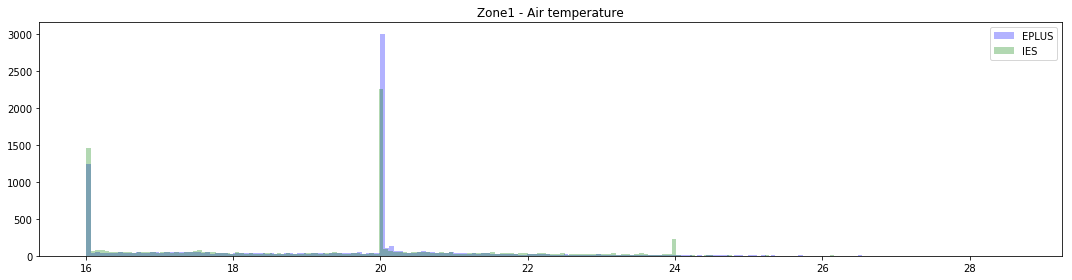

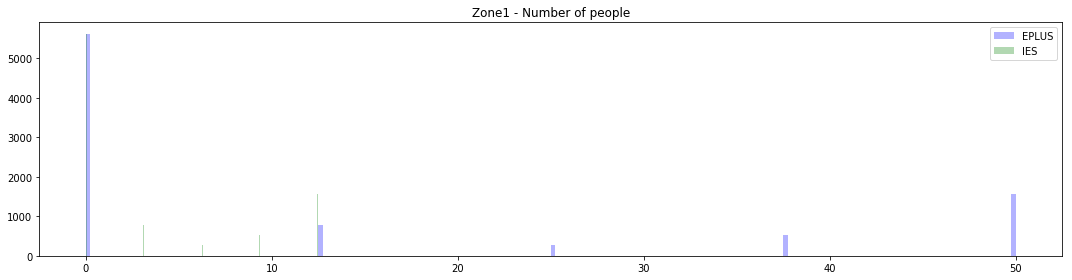

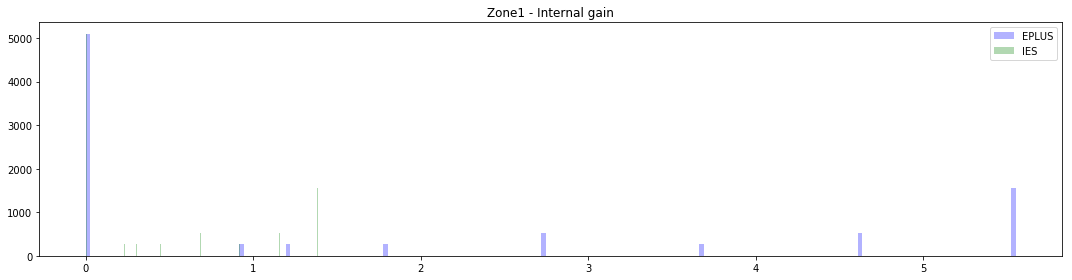

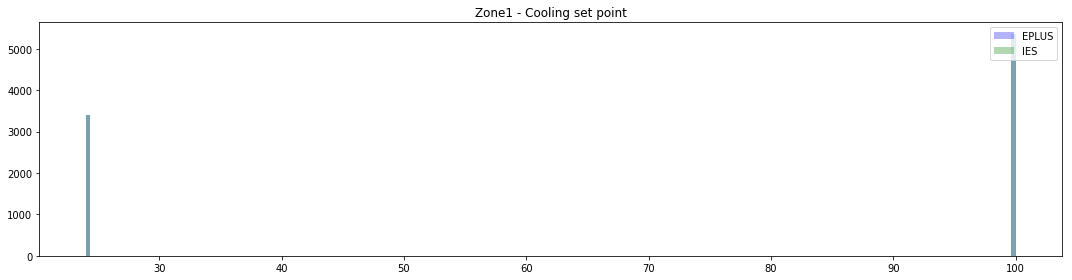

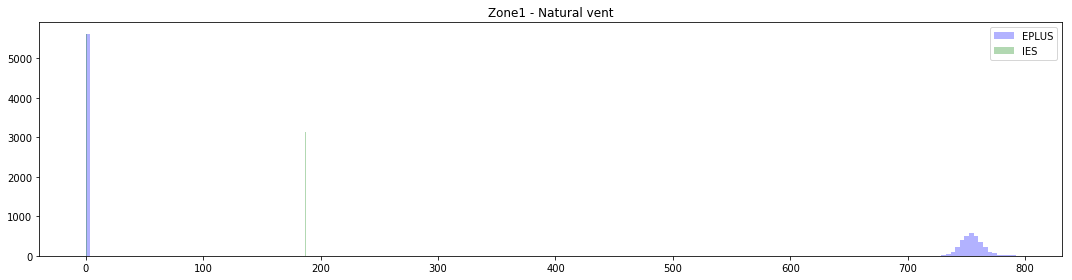

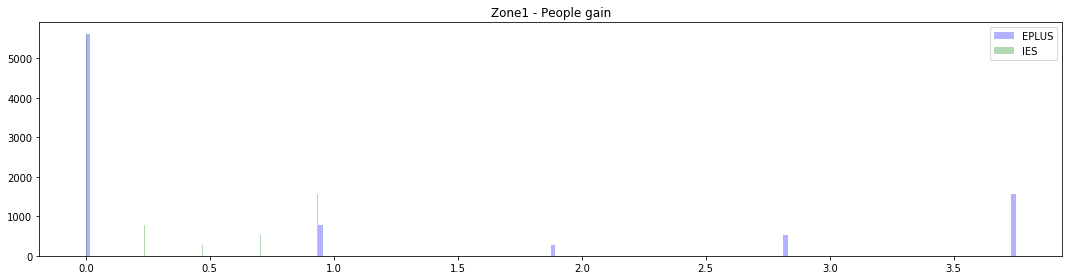

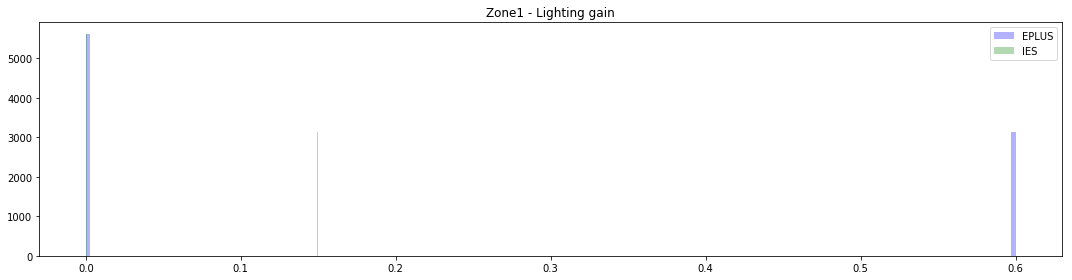

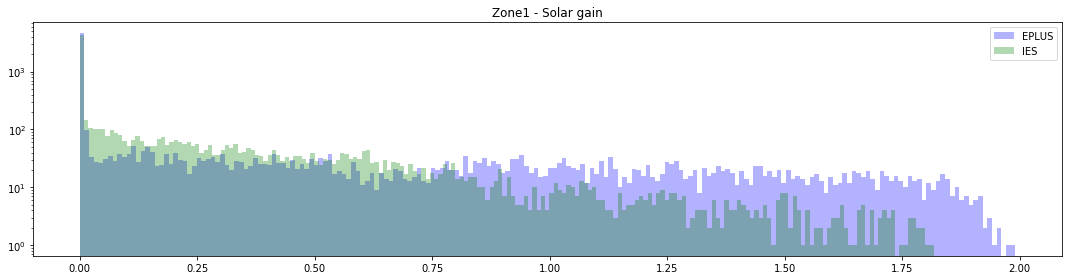

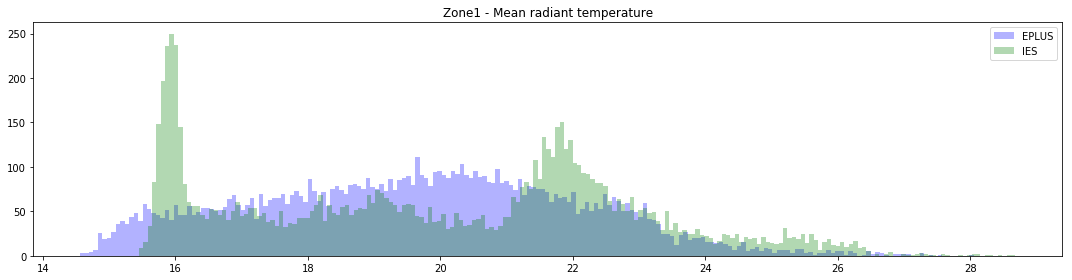

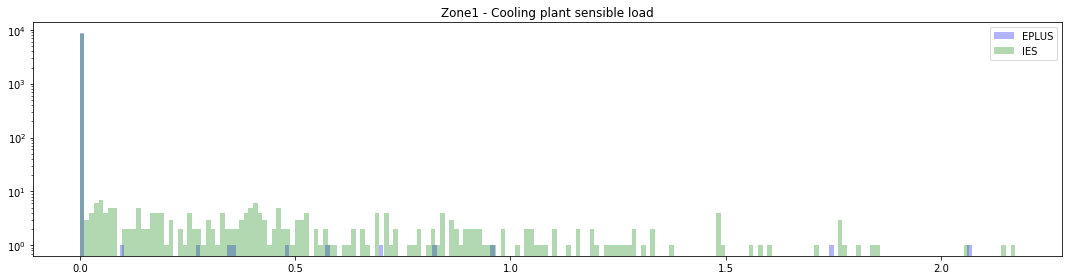

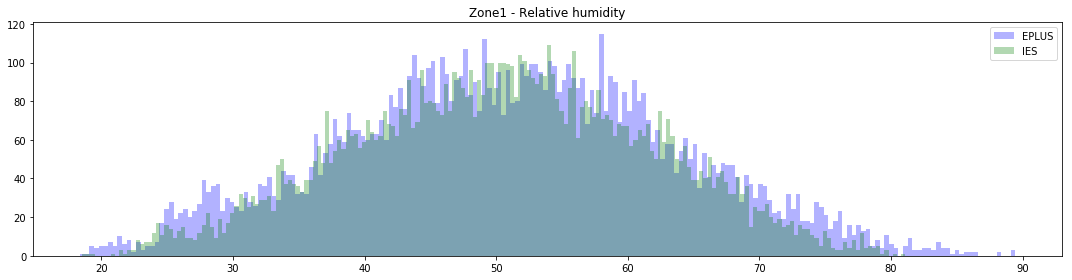

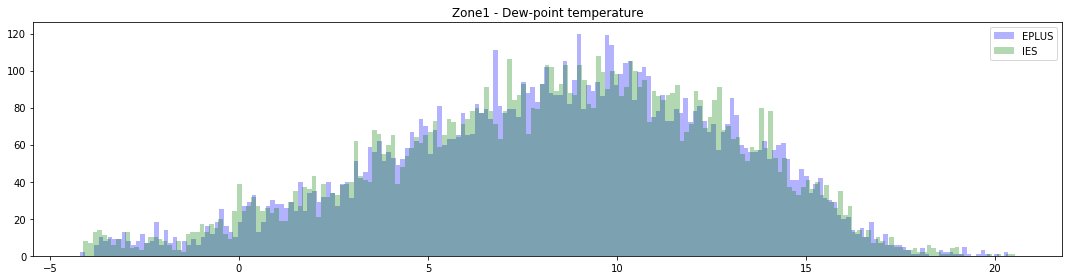

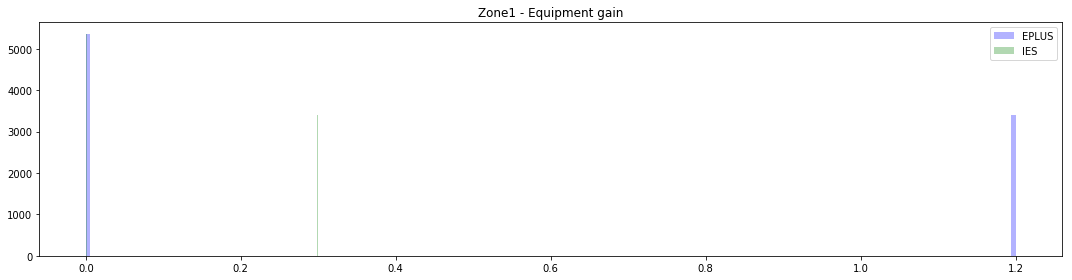

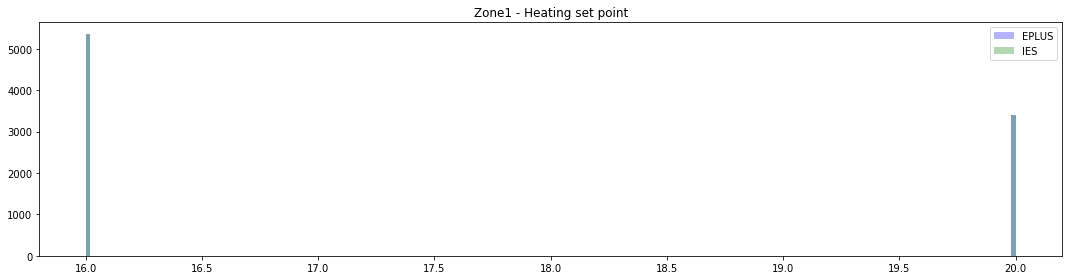

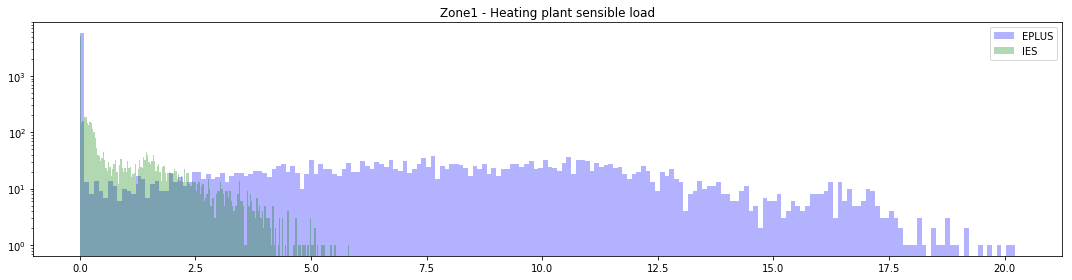

In [51]:
# Compare graphically
space = "Zone1"
bins = 200

for i, j in zip(*[link_vars.values(), link_vars.keys()]):
    fig, ax = plt.subplots(1, 1, figsize=(15, 4))
    ax.hist(EPLUS[space][j], bins, alpha=0.3, label='EPLUS', color="BLUE")
    ax.hist(IES[space][i], bins, alpha=0.3, label='IES', color="GREEN")
    plt.legend(loc='upper right')
    plt.title("{0:} - {1:}".format(space, i))
    
    if "Heating plant sensible" in i or "Cooling plant sensible" in i or "Solar gain" in i:
        plt.yscale('log', nonposy='clip')
    else:
        plt.yscale('linear')
    
    plt.tight_layout()

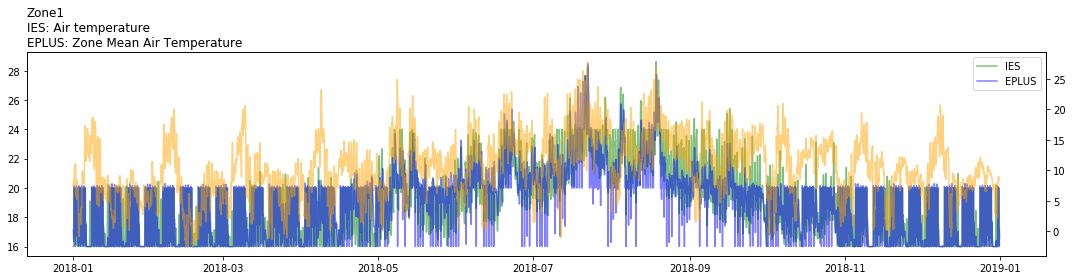

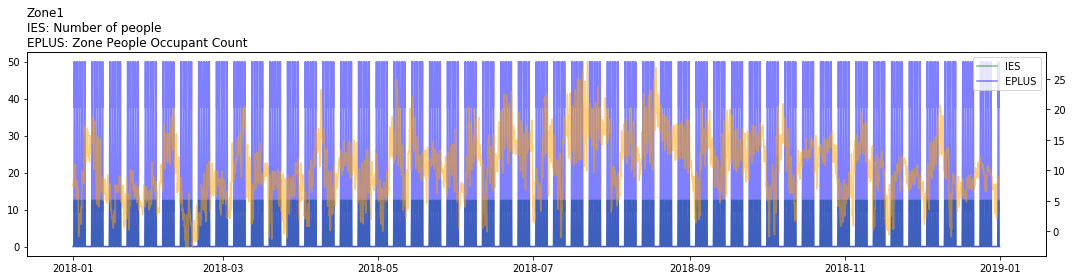

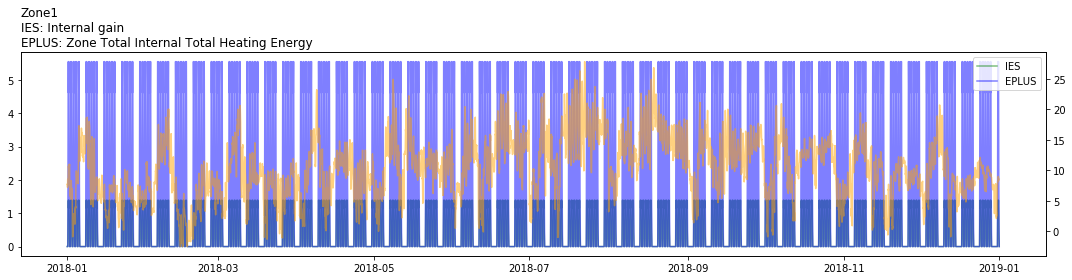

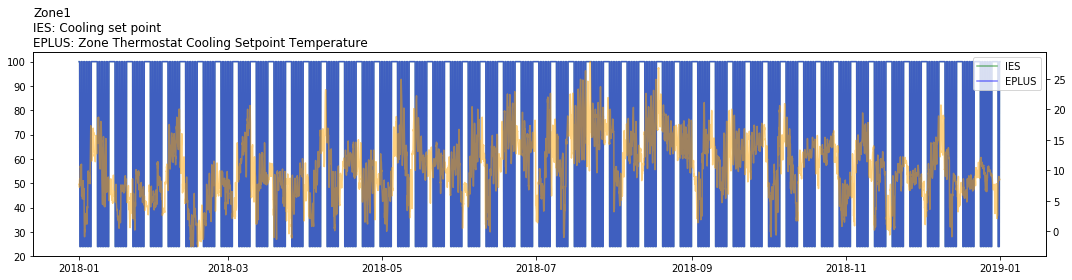

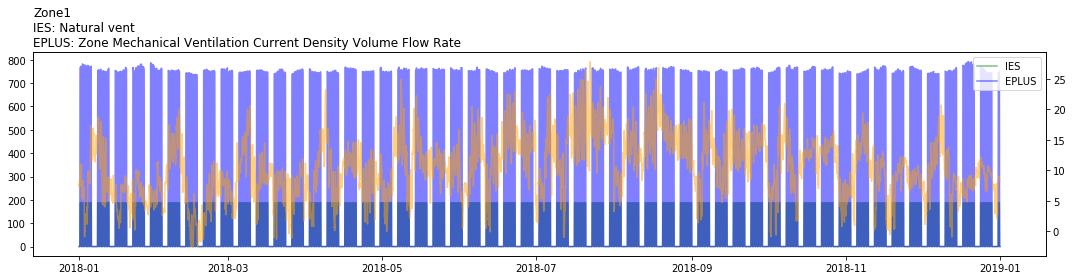

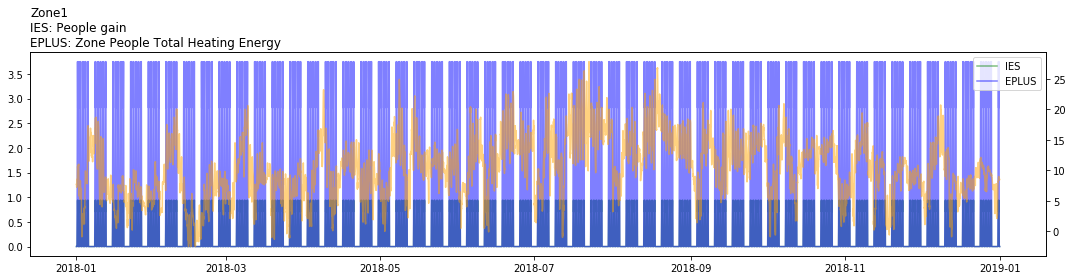

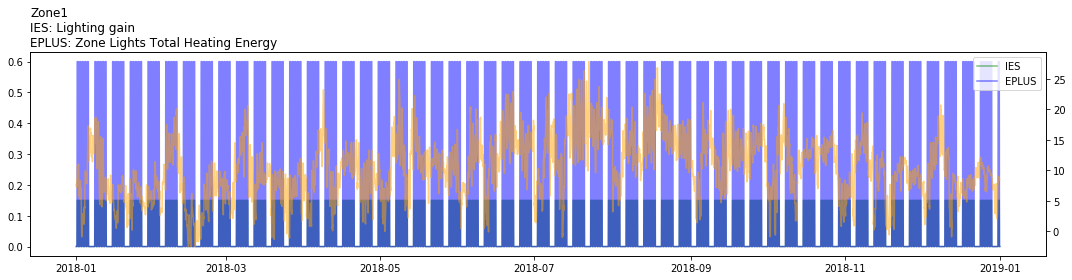

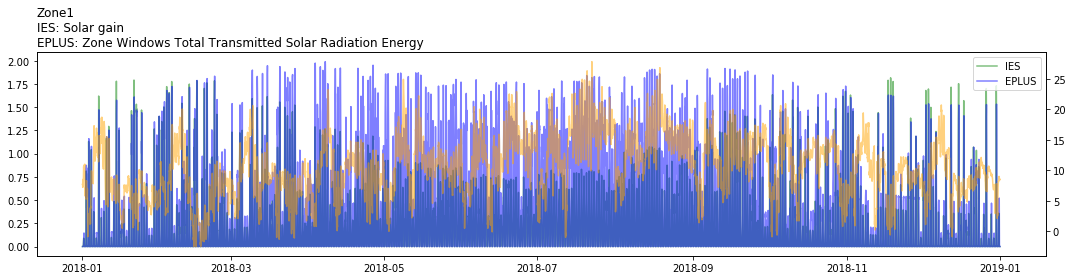

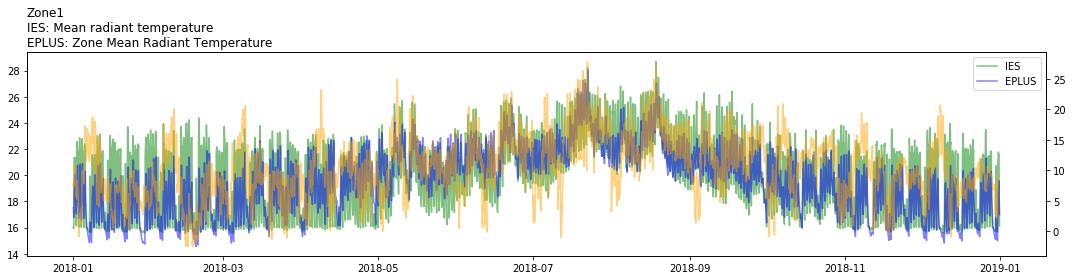

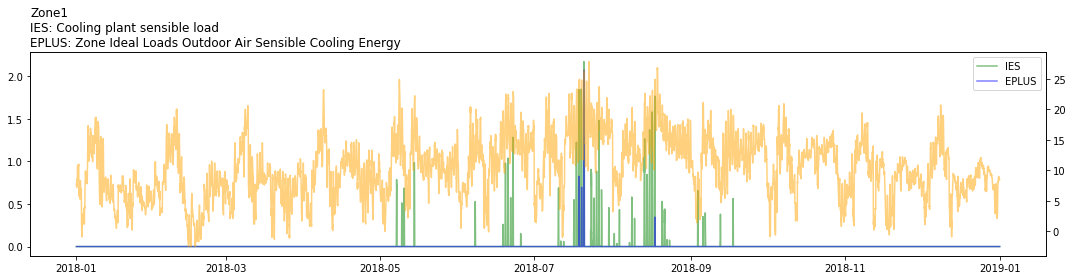

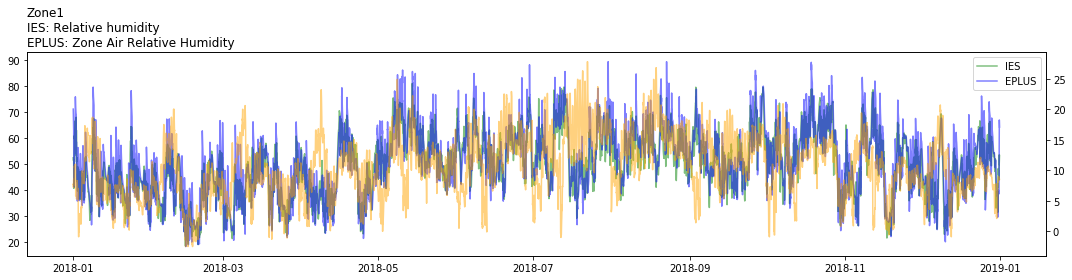

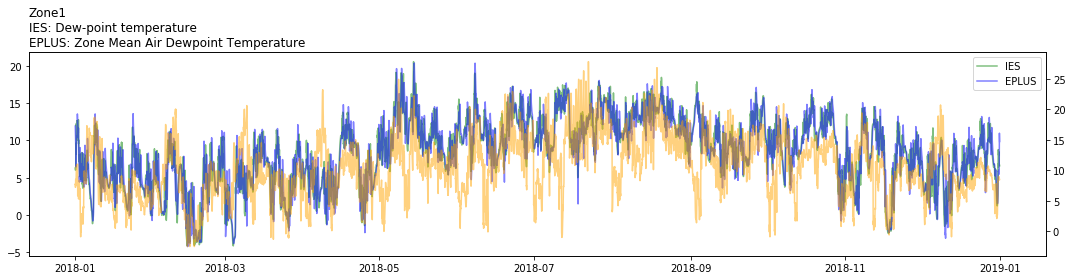

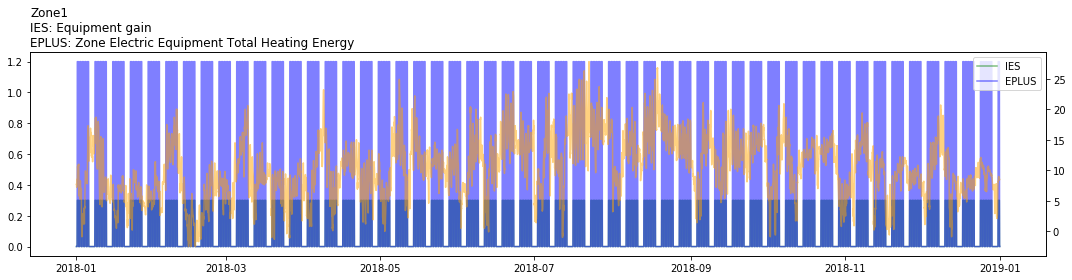

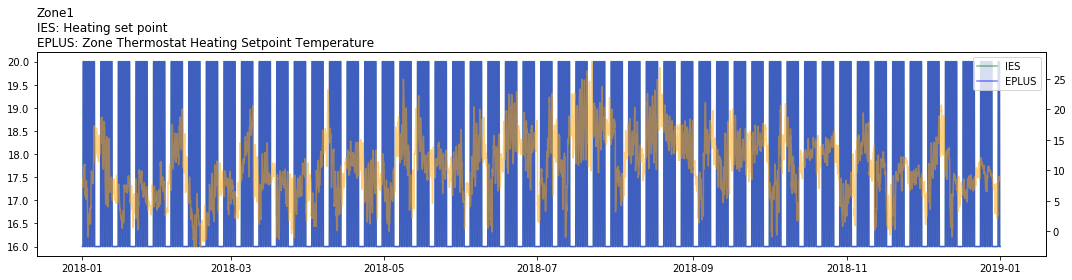

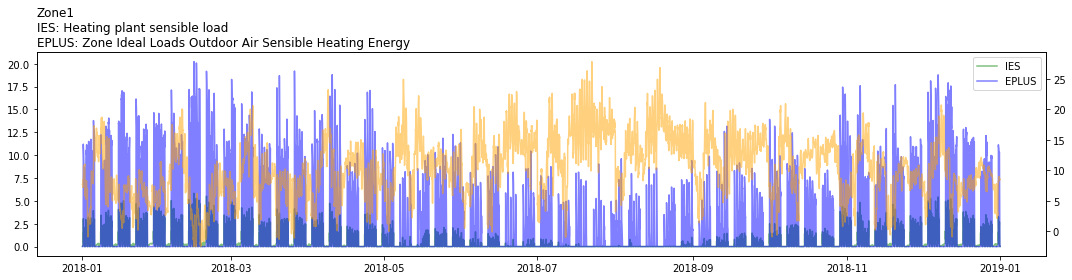

In [52]:
space = "Zone1"
var_num = 2
start = "2018-01-01"
end = "2018-12-31"

for var_num in range(len(link_vars.keys())):
    eplus_var = link_vars.keys()[var_num]
    ies_var = link_vars.values()[var_num]

    fig, ax = plt.subplots(1, 1, figsize=(15, 4))
    axy = ax.twinx()
    ax.plot(IES[space][ies_var][start:end], label="IES", color="GREEN", alpha=0.5)
    ax.plot(EPLUS[space][eplus_var][start:end], label="EPLUS", color="BLUE", alpha=0.5)
    axy.plot(WEATHER["DryBulbTemperature_C"][start:end], label="Te", color='ORANGE', alpha=0.5, ls="-")
    ax.legend(loc='upper right')
    plt.title("{2:}\nIES: {0:}\nEPLUS: {1:}".format(link_vars.values()[var_num], link_vars.keys()[var_num], space), ha="left", x=0.0)
    plt.tight_layout()

In [152]:
# Import data from TAS output

TAS = pd.read_csv(r"C:\Users\tgerrish\Desktop\temp_delete\ExportData1.csv").iloc[:, 4:8]
TAS.columns = pd.MultiIndex.from_product([[i.split(" ")[0] for i in TAS.columns], ["Solar gain"]], names=('zone', 'variable'))
TAS.index = pd.DatetimeIndex(start="2018-01-01 01:00", end="2019-01-01 00:00", freq="60T")
TAS = TAS / 1000

In [154]:
print(IES["Zone1"]["Solar gain"].sum())
print(TAS["Zone1"]["Solar gain"].sum())

1904.407558
2023.69656844


In [169]:
pd.concat([IES["Zone2"]["Solar gain"], TAS["Zone2"]["Solar gain"]], axis=1).describe()

,Solar gain,Solar gain
count,8760.000000,8760.000000
mean,0.181805,0.192150
std,0.291395,0.308808
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.021327,0.009156
75%,0.275469,0.292155
max,1.830422,1.767900


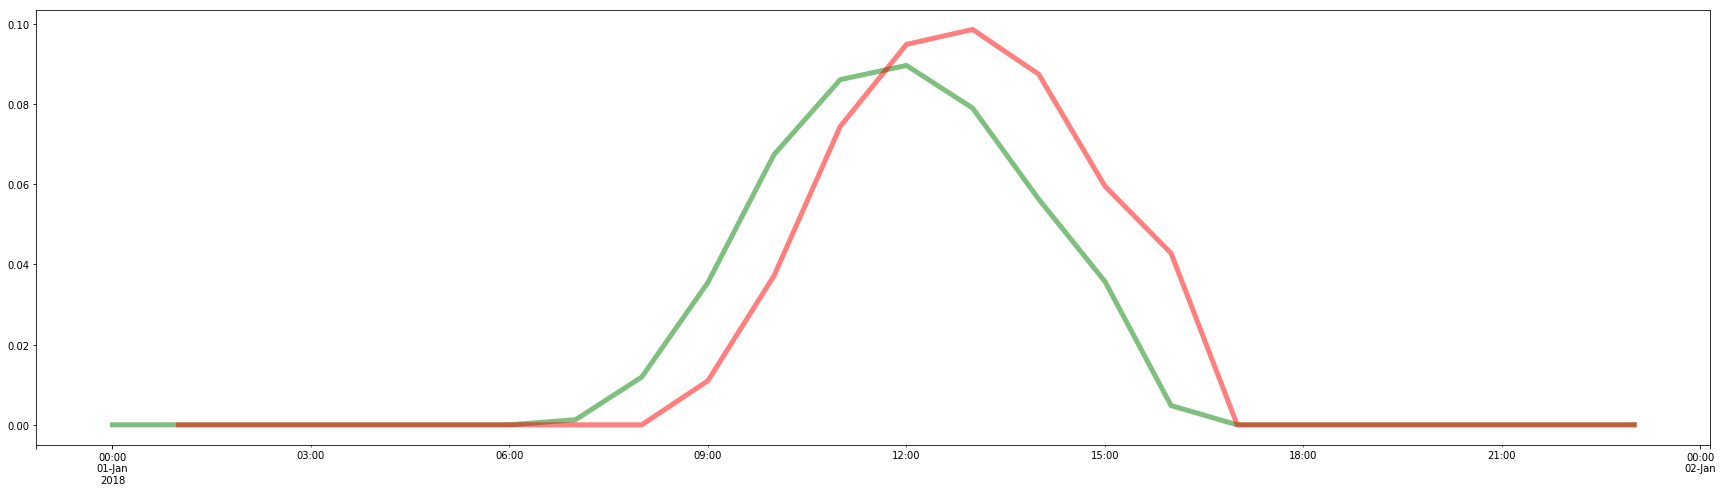

In [161]:
fig, ax = plt.subplots(1, 1, figsize=(30, 8))

IES["Zone2"]["Solar gain"]["2018-01-01"].plot(ax=ax, label="IES", color="GREEN", alpha=0.5, lw=5)
TAS["Zone2"]["Solar gain"]["2018-01-01"].plot(ax=ax, label="TAS", color="RED", alpha=0.5, lw=5)